<a href="https://colab.research.google.com/github/shaon638/Form_processing/blob/main/FormAlign.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importing important libraries



In [45]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


## reading the normal fom template

In [46]:
im1 = cv2.imread("/content/drive/MyDrive/CVIT/image_form/template.jpeg", cv2.IMREAD_COLOR)
im1 = cv2.cvtColor(im1, cv2.COLOR_BGR2RGB)



## reading scanned image with not alignment properly

In [47]:
im2 = cv2.imread("/content/drive/MyDrive/CVIT/image_form/sample1.jpeg", cv2.IMREAD_COLOR)
im2 = cv2.cvtColor(im2, cv2.COLOR_BGR2RGB)

Text(0.5, 1.0, 'sample form')

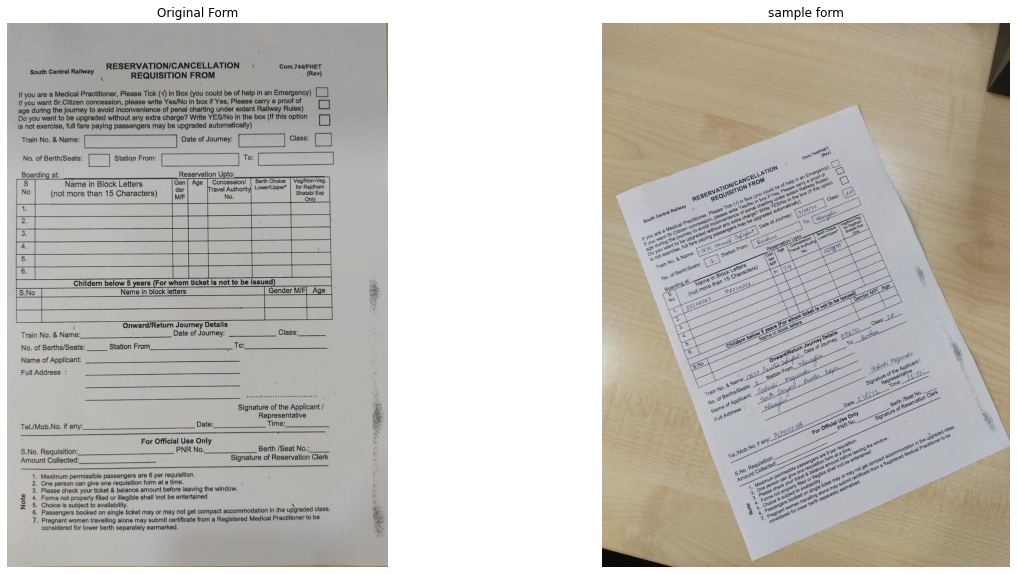

In [48]:
plt.figure(figsize = [20,10])
plt.subplot(121)
plt.imshow(im1)
plt.axis('off')
plt.title("Original Form")

plt.subplot(122)
plt.imshow(im2)
plt.axis('off')
plt.title("sample form")

In [49]:
# convert images to grayscale because the code the follows that is performing some feature extraction on these images 
# only requires a gray scale representation of image

im1_gray = cv2.cvtColor(im1,cv2.COLOR_BGR2GRAY) 
im2_gray = cv2.cvtColor(im2,cv2.COLOR_BGR2GRAY)

#detect ORB features and compute descriptors and keypointsfor each of the images
#each descriptor is actually a vector of some information that describes the region around the keypoint.Vector representation
#of some pixel information around the keypoint
max_num_features = 500
orb = cv2.ORB_create(max_num_features)
keypoints1, descriptors1 = orb.detectAndCompute(im1_gray, None)
keypoints2, descriptors2 = orb.detectAndCompute(im2_gray, None)

#display

im1_display = cv2.drawKeypoints(im1, keypoints1, outImage = np.array([]), color = (255, 0, 0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
im2_display = cv2.drawKeypoints(im2, keypoints2, outImage = np.array([]), color = (255, 0, 0), flags = cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)


Text(0.5, 1.0, 'sample form')

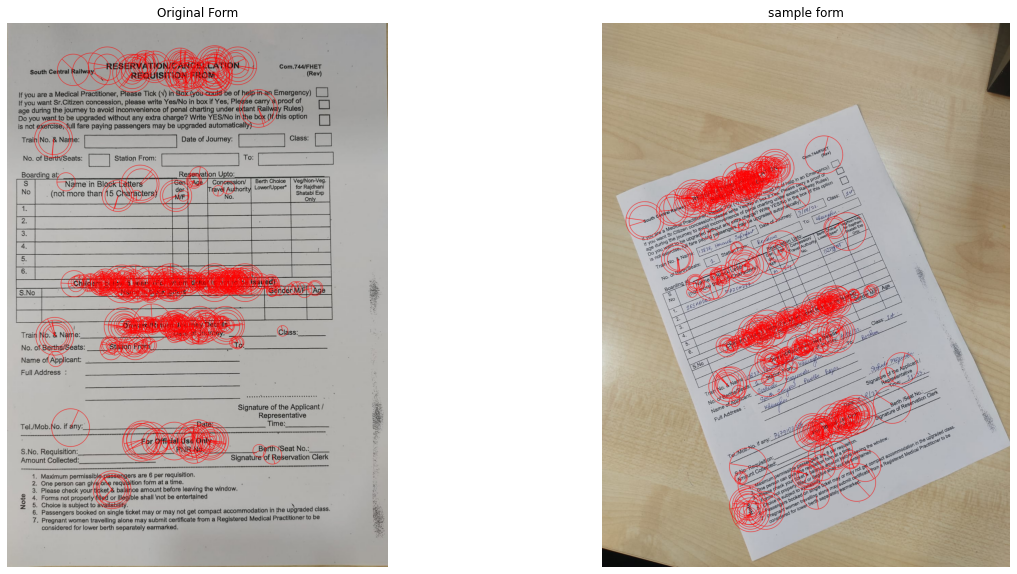

In [50]:
plt.figure(figsize = [20,10])
plt.subplot(121)
plt.imshow(im1_display)
plt.axis('off')
plt.title("Original Form")

plt.subplot(122)
plt.imshow(im2_display)
plt.axis('off')
plt.title("sample form")

In [51]:
#match features

matcher = cv2.DescriptorMatcher_create(cv2.DESCRIPTOR_MATCHER_BRUTEFORCE_HAMMING)
matches = matcher.match(descriptors1, descriptors2, None)

# sort matches by score

matches = sorted(matches, key = lambda x :x.distance, reverse = False)

numGoodMatches = int(len(matches)*0.1)
matches = matches[:numGoodMatches]

Text(0.5, 1.0, 'Original Form')

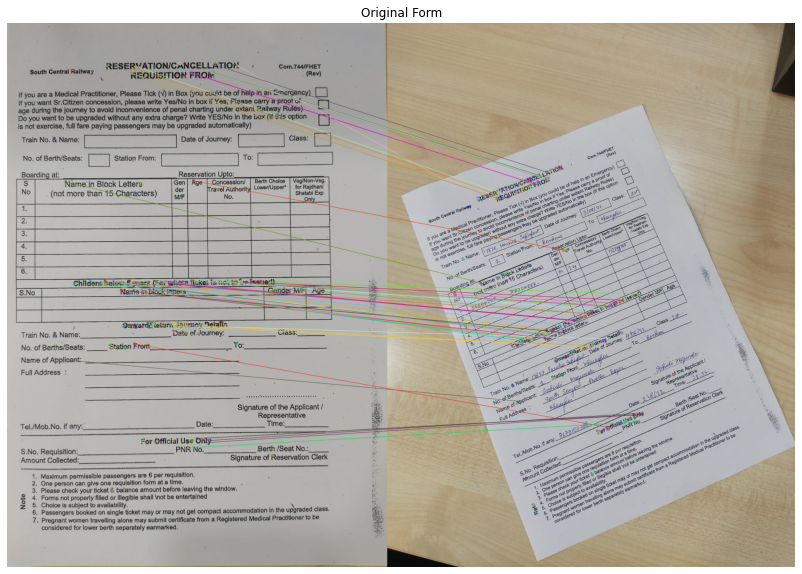

In [52]:
# draw top matches 
im_matches = cv2.drawMatches(im1, keypoints1, im2, keypoints2, list(matches), None)
plt.figure(figsize=[40, 10])
plt.imshow(im_matches)
plt.axis('off')
plt.title("Original Form")


In [53]:
points1 = np.zeros((len(matches),2), dtype = np.float32)
points2 = np.zeros((len(matches), 2), dtype = np.float32)

for i, match in enumerate(matches):
  points1[i, :] = keypoints1[match.queryIdx].pt
  points2[i, :] = keypoints2[match.trainIdx].pt

#Find homography
h, mask = cv2.findHomography(points2, points1, cv2.RANSAC)

Text(0.5, 1.0, 'sample form')

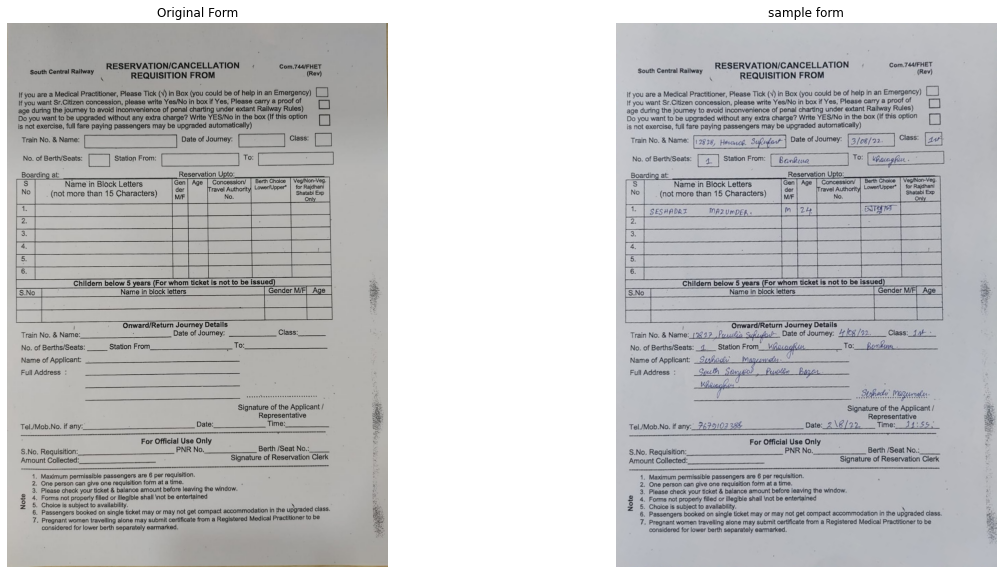

In [54]:
height, width, channels = im1.shape
im2_reg = cv2.warpPerspective(im2, h, (width, height))

#display results
plt.figure(figsize = [20,10])
plt.subplot(121)
plt.imshow(im1)
plt.axis('off')
plt.title("Original Form")

plt.subplot(122)
plt.imshow(im2_reg)
plt.axis('off')
plt.title("sample form")
